## Mitsiu Alejandro Carreño Sarabia E23S-18014

Ejercicio - Como consecuencia de un estudio se conoce que una variable respuesta 𝒀 se explica por dos variables predictivas 𝑿𝟏 y 𝑿𝟐, de acuerdo con el siguiente modelo de regresión lineal, 

𝒀𝒊 = 𝜷𝟎 + 𝜷𝟏𝑿𝟏𝒊 + 𝜷𝟐𝑿𝟐𝒊 + 𝝐𝒊 , 𝒊 = 𝟏, 𝟐, … , 𝒏.

En el estudio mencionado se observaron los siguientes valores de la respuesta y las variables predictivas. Estos valores se muestran en la siguiente Tabla.

In [1]:
import pandas as pd

# Se crea un diccionario con los datos ground truth
data = {
    "y":[21.65, 13.88, 20.81, 30.43, 12.32, 20.11, 18.30, 17.59, 20.63, 19.53, 23.42, 22.15, 23.20, 19.27, 20.01],
    "x1":[9.30, 0.72, 3.64, 8.95, 0.97, 3.14, 1.89, 1.21, 8.01, 6.96, 8.01, 5.91, 4.68, 3.26, 3.77],
    "x2":[1.31, 1.38, 3.13, 4.99, 1.03, 3.34, 3.56, 3.71, 1.09, 1.67, 1.97, 2.47, 4.54, 3.71, 3.10],
}

# Se crea un dataframe para almacenar dichos datos
df = pd.DataFrame(data);

# Se muestra en pantalla el contenido del dataframe
print(df)

        y    x1    x2
0   21.65  9.30  1.31
1   13.88  0.72  1.38
2   20.81  3.64  3.13
3   30.43  8.95  4.99
4   12.32  0.97  1.03
5   20.11  3.14  3.34
6   18.30  1.89  3.56
7   17.59  1.21  3.71
8   20.63  8.01  1.09
9   19.53  6.96  1.67
10  23.42  8.01  1.97
11  22.15  5.91  2.47
12  23.20  4.68  4.54
13  19.27  3.26  3.71
14  20.01  3.77  3.10


In [2]:
# Librería para realizar operaciones en vectores
import numpy as np

# Preparar los datos para modelo
# Se separan nuestras variables independientes
#(número de cambios de requisitos y horas efectivas de testing) se cambia la dimension para sklearn
X = df[["x1","x2"]].values.reshape(-1,2)
# Se separa nuestra variable dependiente (horas efectivas de desarrollo)
Y = df["y"]

# Preparar datos para visualización
# Se separan ambas variables independientes
x = X[:, 0] # x1
y = X[:, 1] # x2
# z tiene nuestra variable dependiente
z = Y

# Se genera un "espacio" del valor mínimo de x1 al valor máximo de x1
# con 30 segmentos
x_pred = np.linspace(0,9,50)
# Se genera un "espacio" del valor mínimo de x2 al valor máximo de x2
# con 30 segmentos
y_pred = np.linspace(0, 5, 50)

# Basado en los espacios de x1 y x2 se genera una red de dos dimensiones
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

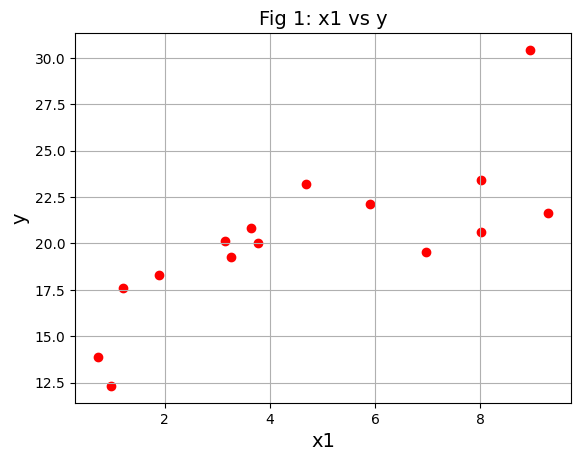

In [3]:
# Se valida la relación lineal entre cada una de las variables independientes
import matplotlib.pyplot as plt

# Se grafíca x1 vs y
plt.scatter(X[:, 0], Y, color='red')
# Se agregan leyendas a la gráfica
plt.title('Fig 1: x1 vs y', fontsize=14)
plt.xlabel('x1', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

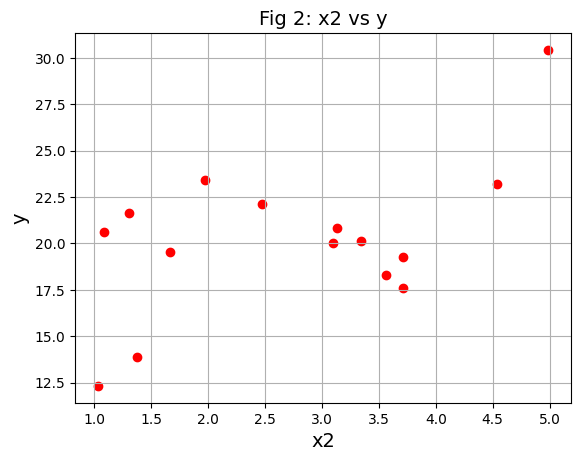

In [4]:
# Se valida la relación lineal entre cada una de las variables independientes

# Se grafica x2 vs y
plt.scatter(X[:, 1], Y, color='red')
# Se agregan leyendas a la gráfica
plt.title('Fig 2: x2 vs y', fontsize=14)
plt.xlabel('x2', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

In [5]:
# Librería con gran variedad de modelos predictivos
from sklearn import linear_model

# Se invoca el constructor del modelo
ols = linear_model.LinearRegression()
# Se ajusta el modelo a los datos de las variables independientes y dependientes
model = ols.fit(X, Y)

# Con el modelo entrenado es posible realizar una predicción que avarque
# el espacio completo a gráficar
predicted = model.predict(model_viz)

In [6]:
# Evaluar modelo (en este caso con los mismos datos de entrenamiento)
print(model.coef_)
print(model.intercept_)

r2 = model.score(X, Y)
r2

[1.15023469 2.01522   ]
9.311763552131122


0.9607394689053832

In [10]:
print(model.predict(np.array([[2, 3.5]])));

[18.66550294]


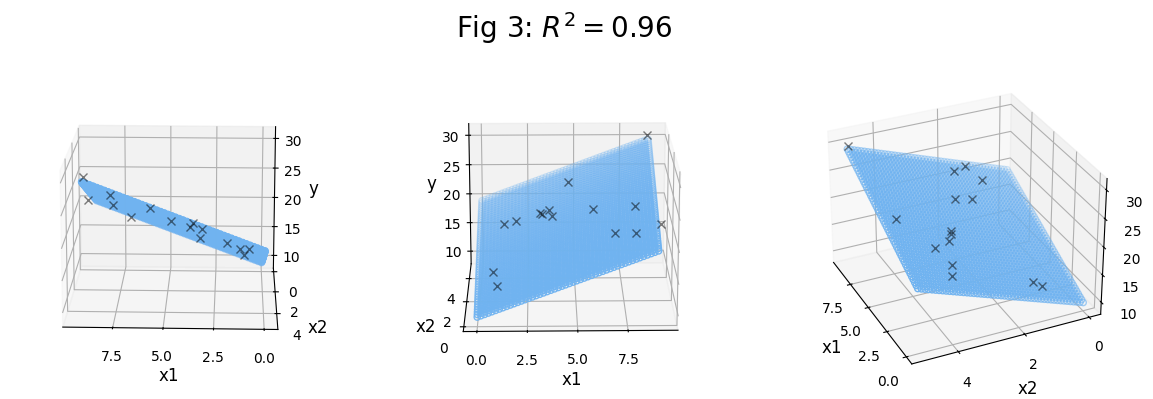

In [7]:
# Gráficar
plt.style.use("default")

# Se define el tamaño de la figura
fig = plt.figure(figsize=(12,4))

# Se definen tres subgráficas todas de tipo 3d
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

# Se agrupan en la variable axes
axes = [ax1, ax2, ax3]

# Para cada subgráfica
for ax in axes:
  # Se gráfica cada uno de los valores ground truth con marcadores "X"
  ax.plot(x, y, z, color="k", zorder=15, linestyle="none", marker="x", alpha=0.5)
  # Se gráfica el plano que avarca el espacio de gráfica completa pero la altitud (eje z) es de acuerdo a la
  # predicción de nuestro modelo
  ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor="#70b3f0")
  # Se agregan leyendas a la gráfica
  ax.set_xlabel("x1", fontsize=12)
  ax.set_ylabel("x2", fontsize=12)
  ax.set_zlabel("y", fontsize=12)
  # Se indica la cantidad de marcas en eje "x" y "y" (variables independientes)
  ax.locator_params(nbins=5, axis="x")
  ax.locator_params(nbins=5, axis="y")

# Se rota la gráfica para apreciarla desde distintos angulos
ax1.view_init(elev=15, azim=92)
ax2.view_init(elev=17, azim=-91)
ax3.view_init(elev=30, azim=155)

# Se agrega un titulo con el valor precisión de nuestro modelo
fig.suptitle("Fig 3: $R^2 = %.2f$" % r2, fontsize=20)

fig.tight_layout()

In [11]:
import statistics

statistics.pvariance(data["x1"])

8.268771555555556

In [12]:
statistics.pvariance(data["x2"])

1.5233022222222223

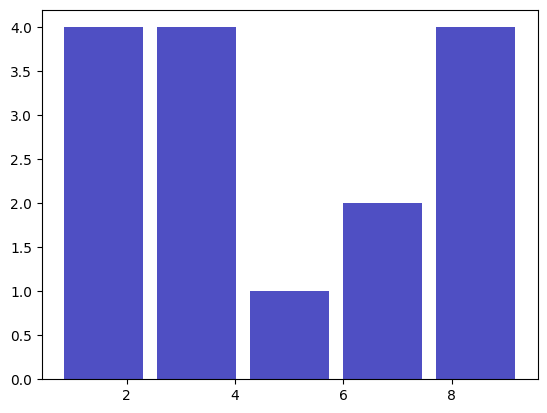

In [13]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=data["x1"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

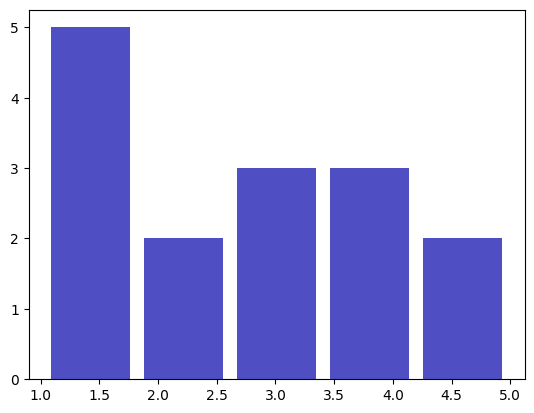

In [14]:
n, bins, patches = plt.hist(x=data["x2"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)